# Final Project: Inside Airbnb – Data Cleaning
# 4/29/2025
# Zachary Kruse
# Dataset: NYC Airbnb Open Data
# Source: https://insideairbnb.com/get-the-data/


## Data Cleaning Overview

This notebook performs cleaning steps on the dataset, preparing it for analysis. The main objectives are to:
- Standardize column names
- Handle missing values
- Convert data types
- Remove or handle outliers
- Simplify categorical variables

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)


## Load the Dataset


In [3]:
# Load the dataset
df = pd.read_csv("listings.csv")  
df.shape


(37434, 79)

## Standardize Column Names

Column names were made lowercase and spaces were replaced with underscores for easier reference.


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')


## Clean Price Column

The price column was a string containing dollar signs and commas. These were removed and the column was converted to numeric.


In [6]:
df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)



## Missing Values Overview

Check how many columns have missing values and which ones are most affected.


In [7]:
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)


calendar_updated               37434
license                        32065
neighborhood_overview          17210
neighbourhood                  17209
host_response_time             16148
host_response_rate             16148
host_about                     15979
price                          15126
estimated_revenue_l365d        15126
beds                           15082
bathrooms                      14931
host_acceptance_rate           14694
review_scores_location         11805
review_scores_value            11804
review_scores_checkin          11802
review_scores_accuracy         11798
review_scores_communication    11793
review_scores_cleanliness      11788
review_scores_rating           11787
last_review                    11787
first_review                   11787
reviews_per_month              11787
host_neighbourhood              7716
host_location                   7687
bedrooms                        5911
has_availability                5377
description                      993
h

## Drop Useless or Unrecoverable Columns

The calendar_updated column has 0 non-null entries and is dropped. Rows missing a price are also dropped.


In [8]:
df.drop(columns=['calendar_updated'], inplace=True)
df = df[df['price'].notnull()]


## Fill Missing Values with Medians

Missing values in bedrooms, beds, and bathrooms are filled with median values to retain rows for analysis.


## outlier Detection and Removal

Listings with extreme prices (above $1000) are considered outliers for general analysis and are removed.


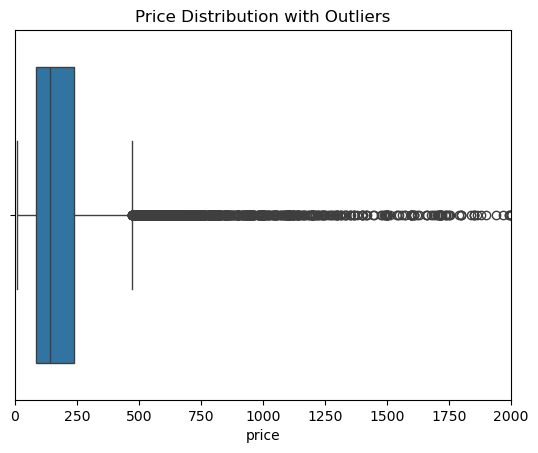

In [9]:
sns.boxplot(x=df['price'])
plt.xlim(0, 2000)
plt.title("Price Distribution with Outliers")
plt.show()

df = df[df['price'] < 1000]


## Convert Date Columns

Convert string date columns into datetime format.


In [10]:
date_cols = ['last_scraped', 'host_since', 'first_review', 'last_review']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')


## simplify Property Type

Only the top 10 most common property types are kept; the rest are grouped into "Other".


In [11]:
top_props = df['property_type'].value_counts().nlargest(10).index
df['property_type'] = df['property_type'].apply(lambda x: x if x in top_props else 'Other')


## Save the Cleaned Dataset


In [12]:
df.to_csv("cleaned_airbnb_nyc.csv", index=False)


In [13]:
df.info()
df.describe(include='all')
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 21986 entries, 0 to 37433
Data columns (total 78 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            21986 non-null  float64       
 1   listing_url                                   21986 non-null  object        
 2   scrape_id                                     21986 non-null  float64       
 3   last_scraped                                  21986 non-null  datetime64[ns]
 4   source                                        21986 non-null  object        
 5   name                                          21986 non-null  object        
 6   description                                   21586 non-null  object        
 7   neighborhood_overview                         12079 non-null  object        
 8   picture_url                                   21986 non-null  object   

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,36121.0,https://www.airbnb.com/rooms/36121,2.025030e+13,2025-03-03,city scrape,Lg Rm in Historic Prospect Heights,Cozy space share in the heart of a great neigh...,Full of tree-lined streets and beautiful brown...,https://a0.muscache.com/pictures/8776354/35b32...,62165,https://www.airbnb.com/users/show/62165,Michael,2009-12-11,"New York, NY",I’m an urban planner working for an internatio...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/62165/profile...,https://a0.muscache.com/im/users/62165/profile...,Prospect Heights,1.0,3.0,"['email', 'phone', 'work_email']",t,t,Neighborhood highlights,Prospect Heights,Brooklyn,40.673760,-73.966110,Private room in rental unit,Private room,1,1.0,1 shared bath,1.0,1.0,"[""Refrigerator"", ""Dishes and silverware"", ""Wif...",200.0,90,365,90.0,90.0,365.0,365.0,90.0,365.0,t,27,57,87,362,3/3/2025,9,0,0,301,0,0,0.0,2010-12-11,2013-05-10,4.88,5.00,4.80,5.00,5.00,5.00,5.00,NaN,f,1,0,1,0,0.05
1,36647.0,https://www.airbnb.com/rooms/36647,2.025030e+13,2025-03-03,city scrape,"1 Bedroom & your own Bathroom, Elevator Apartment",Private bedroom with your own bathroom in a 2 ...,"Manhattan, SE corner of 2nd Ave/ E. 110th street",https://a0.muscache.com/pictures/miso/Hosting-...,157798,https://www.airbnb.com/users/show/157798,Irene,2010-07-04,"New York, NY",NaN,NaN,NaN,100%,f,https://a0.muscache.com/im/pictures/user/e8797...,https://a0.muscache.com/im/pictures/user/e8797...,East Harlem,1.0,1.0,"['email', 'phone']",t,t,Neighborhood highlights,East Harlem,Manhattan,40.792454,-73.940742,Private room in condo,Private room,2,1.0,1 private bath,1.0,1.0,"[""Oven"", ""Blender"", ""Luggage dropoff allowed"",...",82.0,30,999,30.0,30.0,999.0,999.0,30.0,999.0,t,0,0,0,204,3/3/2025,102,0,0,143,0,0,0.0,2010-10-04,2023-12-09,4.77,4.82,4.76,4.88,4.90,4.38,4.71,NaN,f,1,0,1,0,0.58
2,38663.0,https://www.airbnb.com/rooms/38663,2.025030e+13,2025-03-02,city scrape,Luxury Brownstone in Boerum Hill,"Beautiful, large home in great hipster neighbo...","diverse, lively, hip, cool: loaded with restau...",https://a0.muscache.com/pictures/miso/Hosting-...,165789,https://www.airbnb.com/users/show/165789,Sarah,2010-07-13,"New York, NY",I am a lawyer and work as an executive at an a...,within a few hours,100%,40%,f,https://a0.muscache.com/im/users/165789/profil...,https://a0.muscache.com/im/users/165789/profil...,Boerum Hill,1.0,3.0,"['email', 'phone', 'work_email']",t,t,Neighborhood highlights,Boerum Hill,Brooklyn,40.684420,-73.980680,Private room in home,Private room,2,2.5,2.5 baths,5.0,5.0,"[""Portable fans"", ""Oven"", ""Baking sheet"", ""Fir...",765.0,3,60,3.0,3.0,6